In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train = pd.read_csv('./drive/My Drive/dl_1_hw_8/train.csv', encoding='ISO-8859-1')
df_train.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [0]:
df_test = pd.read_csv('./drive/My Drive/dl_1_hw_8/train.csv', encoding='ISO-8859-1')
df_test.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [0]:
df_train['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [0]:
df_train['SentimentText'] = df_train['SentimentText'].apply(lambda x : x.strip().lower())

In [0]:
X, y = df_train['SentimentText'].tolist(), df_train['Sentiment'].tolist()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([1.866e+03, 3.012e+03, 3.715e+03, 9.693e+03, 5.352e+03, 5.110e+03,
        5.153e+03, 9.838e+03, 4.643e+03, 4.487e+03, 4.166e+03, 7.675e+03,
        3.606e+03, 3.543e+03, 3.379e+03, 6.698e+03, 3.121e+03, 3.142e+03,
        2.936e+03, 4.838e+03, 1.646e+03, 1.117e+03, 5.850e+02, 5.300e+02,
        7.400e+01, 3.500e+01, 1.800e+01, 3.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

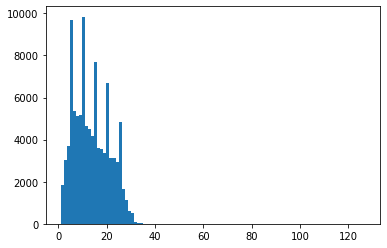

In [0]:
plt.hist([len(i.split(' ')) for i in X],bins=100)


In [0]:
max([len(i.split(' ')) for i in X])

127

In [0]:
X = list(map(lambda x : re.sub(r'\s+',' ',x.strip()), X))

In [0]:
X = list(map(lambda x : re.sub(r'([abcdifghijklmnopqrstuvwxyz])\1+',r'\1',x.strip()), X))

## Работаем с выборкой

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y_train = l.fit_transform(y_train)
y_test = l.transform(y_test)

In [0]:
text = ' '.join(X_train)

In [0]:
import re 
ALL_WORDS = set(re.sub(r'\s+',' ', text).split(' '))

In [0]:
len(ALL_WORDS)

136176

In [0]:
from collections import Counter

In [0]:
c = Counter(re.sub(r'\s+',' ', text).split(' '))
c.most_common(20)

[('i', 39114),
 ('to', 25848),
 ('the', 23723),
 ('you', 18953),
 ('a', 17566),
 ('and', 12693),
 ('it', 11268),
 ('my', 10924),
 ('for', 9934),
 ('of', 9451),
 ('is', 9325),
 ('in', 9155),
 ('that', 8058),
 ('have', 7825),
 ('so', 7552),
 ('on', 7359),
 ('me', 6951),
 ('but', 6867),
 ("i'm", 6638),
 ('be', 5791)]

In [0]:
WORDS_COUNT = 10000

In [0]:
ALL_WORDS = set([w for w, _ in c.most_common(WORDS_COUNT)])

In [0]:
INDEX_TO_WORD = ['<pad>', '<miss>'] + list(ALL_WORDS)

In [0]:
len(INDEX_TO_WORD)


10002

In [0]:
WORD_TO_INDEX = {w: i for i, w in enumerate(INDEX_TO_WORD)}

In [0]:
INDEX_TO_WORD[:10]

['<pad>',
 '<miss>',
 'please.',
 'conection',
 'chinese',
 'more!',
 'definitely.',
 'yours!',
 'mid',
 'god.']

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

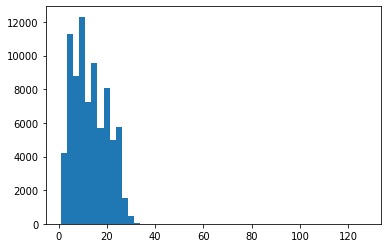

In [0]:
x = plt.hist([len(s.split(' ')) for s in X_train], bins=50)

## Формируем датасеты

In [0]:
MAX_LEN = 30

In [0]:
import torch

In [0]:
train_data = torch.zeros((len(X_train), MAX_LEN), dtype=int)
test_data = torch.zeros((len(X_test), MAX_LEN), dtype=int)

In [0]:
for i in range(len(X_train)):
  for j, w in enumerate(re.sub(r'\s+',' ', X_train[i]).split(' ')):
    if j >= MAX_LEN:
      break
    train_data[i, j] = WORD_TO_INDEX.get(w, WORD_TO_INDEX['<miss>'])

In [0]:
for i in range(len(X_test)):
  for j, w in enumerate(re.sub(r'\s+',' ', X_test[i]).split(' ')):
    if j >= MAX_LEN:
      break
    test_data[i, j] = WORD_TO_INDEX.get(w, WORD_TO_INDEX['<miss>'])

In [0]:
train_dataset = torch.utils.data.TensorDataset(train_data, torch.LongTensor(y_train))
test_dataset = torch.utils.data.TensorDataset(test_data, torch.LongTensor(y_test))

In [0]:
BATCH_SIZE = 128

In [0]:
train = torch.utils.data.DataLoader(train_dataset, BATCH_SIZE, shuffle=True)
test = torch.utils.data.DataLoader(test_dataset, BATCH_SIZE, shuffle=False)

In [0]:
dev = torch.device('cuda')

## Модель

In [0]:
from torch import nn

In [0]:
class GRUModel(nn.Module):
  def __init__(self, dict_size, embed_size, num_hiddens, num_classes, num_layers=1):
    super().__init__()

    self.num_hiddens = num_hiddens
    self.embed = nn.Embedding(dict_size, embed_size)
    self.rnn = nn.GRU(embed_size, num_hiddens, num_layers=num_layers, batch_first=True)
    self.output = nn.Linear(num_hiddens, num_classes)

  def forward(self, X):
    output = self.embed(X)
    y, s = self.rnn(output)
    return self.output(s[0])

In [0]:
class LSTMModel(nn.Module):
  def __init__(self, dict_size, embed_size, num_hiddens, num_classes, num_layers=1):
    super().__init__()

    self.num_hiddens = num_hiddens
    self.embed = nn.Embedding(dict_size, embed_size)
    self.rnn = nn.LSTM(embed_size, num_hiddens, num_layers=num_layers, batch_first=True)
    self.output = nn.Linear(num_hiddens, num_classes)

  def forward(self, X):
    output = self.embed(X)
    y, s = self.rnn(output)
    return self.output(s[0][0])

## Обучение

In [0]:
import time

In [0]:
def validate_acc(model, dataset, dev):
  loss = nn.CrossEntropyLoss(reduction='sum')
  loss_acc, passed, correct = 0., 0, 0
  for X, y in dataset:
    X = X.to(dev)
    y = y.to(dev)

    output = model(X)
    l = loss(output, y)

    loss_acc += l.item()
    correct += (output.argmax(dim=1) == y).sum().item()
    passed += len(y)

  return loss_acc / passed, correct / passed

In [0]:
def train_model(model, train_dl, test_dl, trainer, dev, num_epochs=25):
  loss = nn.CrossEntropyLoss(reduction='sum')
  for ep in range(num_epochs):
    ep_start, tloss_acc, tpassed, tcorrect = time.time(), 0., 0, 0
    for X, y in train_dl:
      X, y = X.to(dev), y.to(dev)
      trainer.zero_grad()

      output = model(X)
      l = loss(output, y)
      l.backward()
      trainer.step()

      tloss_acc += l.item()
      tcorrect += (output.argmax(dim=1) == y).sum().item()
      tpassed += len(y)
    
    test_loss, test_acc = validate_acc(model, test_dl, dev)

    print('Epoch {}. Taked {:.3f} sec. Train loss: {:.3f}, Train acc {:.3f}, Test  Loss {:.3f}, Test Acc {:.3f}'.format(
        ep, time.time() - ep_start, tloss_acc / tpassed, tcorrect / tpassed, test_loss, test_acc
    ))

## Эксперимент

In [0]:
model = GRUModel(len(INDEX_TO_WORD), 300, 256, 2).to(dev)
trainer = torch.optim.SGD(model.parameters(), lr=0.0001)
train_model(model, train, test, trainer, dev, num_epochs=45)

Epoch 0. Taked 4.261 sec. Train loss: 0.686, Train acc 0.561, Test  Loss 0.683, Test Acc 0.569
Epoch 1. Taked 4.070 sec. Train loss: 0.685, Train acc 0.567, Test  Loss 0.682, Test Acc 0.572
Epoch 2. Taked 4.090 sec. Train loss: 0.684, Train acc 0.567, Test  Loss 0.684, Test Acc 0.572
Epoch 3. Taked 4.148 sec. Train loss: 0.684, Train acc 0.566, Test  Loss 0.680, Test Acc 0.575
Epoch 4. Taked 4.139 sec. Train loss: 0.682, Train acc 0.568, Test  Loss 0.682, Test Acc 0.573
Epoch 5. Taked 4.139 sec. Train loss: 0.678, Train acc 0.574, Test  Loss 0.676, Test Acc 0.583
Epoch 6. Taked 4.178 sec. Train loss: 0.669, Train acc 0.589, Test  Loss 0.665, Test Acc 0.602
Epoch 7. Taked 4.155 sec. Train loss: 0.655, Train acc 0.613, Test  Loss 0.649, Test Acc 0.620
Epoch 8. Taked 4.176 sec. Train loss: 0.640, Train acc 0.633, Test  Loss 0.636, Test Acc 0.637
Epoch 9. Taked 4.164 sec. Train loss: 0.624, Train acc 0.650, Test  Loss 0.623, Test Acc 0.654
Epoch 10. Taked 4.210 sec. Train loss: 0.608, Trai

In [0]:
torch.save(model.state_dict(), 'model')

In [0]:
model = LSTMModel(len(INDEX_TO_WORD), 300,256, 2).to(dev)
trainer = torch.optim.SGD(model.parameters(), lr=0.0001)
train_model(model, train, test, trainer, dev, num_epochs=45)

Epoch 0. Taked 4.698 sec. Train loss: 0.685, Train acc 0.564, Test  Loss 0.684, Test Acc 0.567
Epoch 1. Taked 4.605 sec. Train loss: 0.684, Train acc 0.565, Test  Loss 0.683, Test Acc 0.568
Epoch 2. Taked 4.609 sec. Train loss: 0.683, Train acc 0.567, Test  Loss 0.682, Test Acc 0.572
Epoch 3. Taked 4.682 sec. Train loss: 0.683, Train acc 0.569, Test  Loss 0.682, Test Acc 0.572
Epoch 4. Taked 4.718 sec. Train loss: 0.683, Train acc 0.570, Test  Loss 0.681, Test Acc 0.572
Epoch 5. Taked 4.731 sec. Train loss: 0.683, Train acc 0.570, Test  Loss 0.681, Test Acc 0.573
Epoch 6. Taked 4.706 sec. Train loss: 0.682, Train acc 0.571, Test  Loss 0.682, Test Acc 0.575
Epoch 7. Taked 4.843 sec. Train loss: 0.682, Train acc 0.570, Test  Loss 0.680, Test Acc 0.575
Epoch 8. Taked 4.766 sec. Train loss: 0.682, Train acc 0.570, Test  Loss 0.680, Test Acc 0.576
Epoch 9. Taked 4.791 sec. Train loss: 0.681, Train acc 0.570, Test  Loss 0.678, Test Acc 0.576
Epoch 10. Taked 4.776 sec. Train loss: 0.679, Trai

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer()
X_tf_idf = vectorizer.fit_transform(X_train)


In [0]:
X_tf_idf_test = vectorizer.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier()

In [0]:
clf.fit(X_tf_idf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict_proba(X_tf_idf_test)
y_pred_int = clf.predict(X_tf_idf_test)


In [0]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score 

In [0]:
roc_auc_score(y_test, y_pred[:, 1])

0.8354224895865703

In [0]:
accuracy_score(y_test,y_pred_int)

0.7592759275927593

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])

No handles with labels found to put in legend.


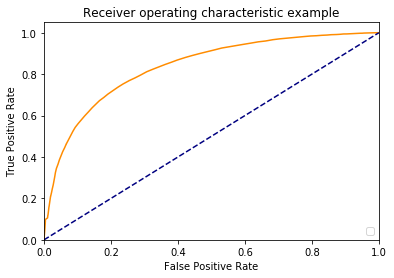

In [0]:
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
